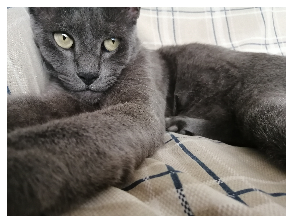

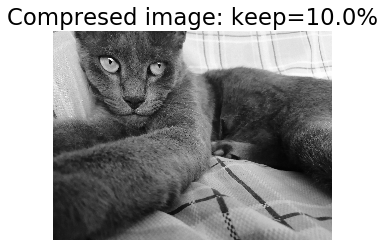

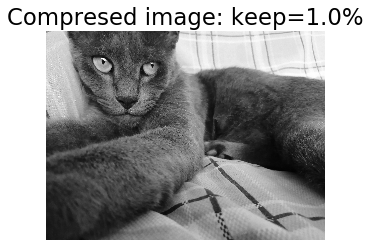

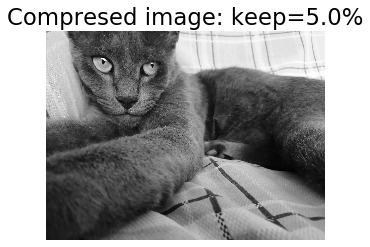

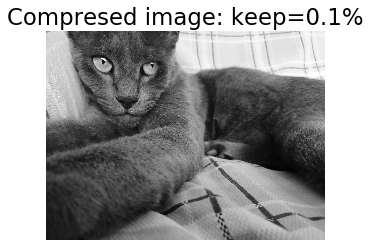

In [2]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt
plt.rcParams['figure.figsize']=[5,5]
plt.rcParams.update({'font.size': 19})

A= imread(os.path.join('c:/Users/Omar/prieto.jpg'))
B= np.mean(A,-1);

plt.figure()
plt.imshow(A)
plt.axis('off')

Bt= np.fft.fft2(B)
Btsort= np.sort(np.abs(Bt.reshape(-1))) #We do this to sort by magnitude
for keep in (0.1,0.01,0.05,0.001):
 
    tresh= Btsort[int(np.floor(1-keep)*len(Btsort))];
    ind = np.abs(Bt) > tresh
    Btlow=Bt * ind
    Alow = np.fft.ifft2(Btlow).real
    plt.figure()
    plt.imshow(Alow, cmap='gray')
    plt.axis('off')
    plt.title('Compresed image: keep='+str(keep*100)+ '%')
    



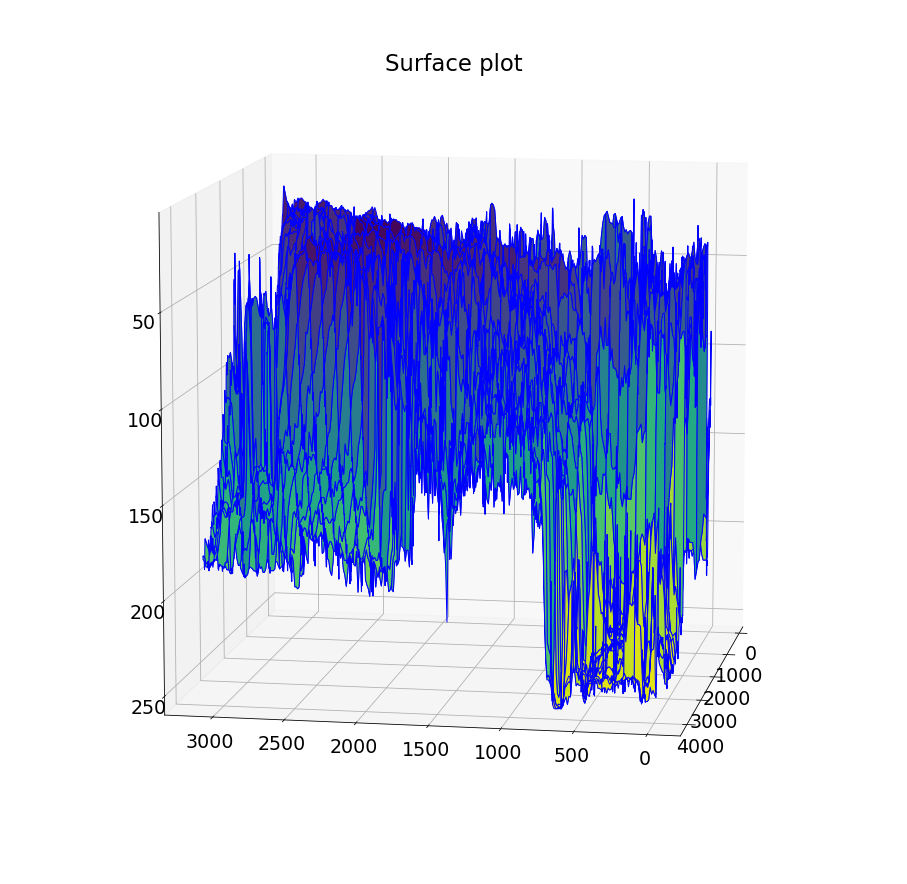

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
plt.rcParams['figure.figsize']=[16,16]

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
X, Y =np.meshgrid(np.arange(1,np.shape(B)[1]+1),np.arange(1,np.shape(B)[0]+1))
ax.plot_surface(X[0::10, 0::10], Y[0::10, 0::10], B[0::10, 0::10], cmap= 'viridis', edgecolor= 'blue' )
ax.set_title('Surface plot')
ax.mouse_init()
ax.view_init(350,350)
plt.show()